In [1]:
# from torchsr.datasets import Div2K
# from torchsr.models import ninasr_b0
from utils.training_utils import (
    Siren,
    ImageFitting,
    pixel_coordinates_normalized,
    plot_image,
    list_png_files,
    load_image,
    train_siren,
)
from torch.utils.data import DataLoader
from PIL import Image
from tqdm import tqdm
import numpy as np
import torch
import os
import itertools
import matplotlib.pyplot as plt

# Autoreload
%reload_ext autoreload
%autoreload 2

# Div2K dataset
# dataset = Div2K(root="./data", scale=2, download=False)

In [2]:
# List all PNG files in the data folder
data_folder = "data"
image_files = list_png_files(data_folder)
print(f"Available PNG files: {image_files}")

Available PNG files: ['0010.png', '0028.png', '0002.png']


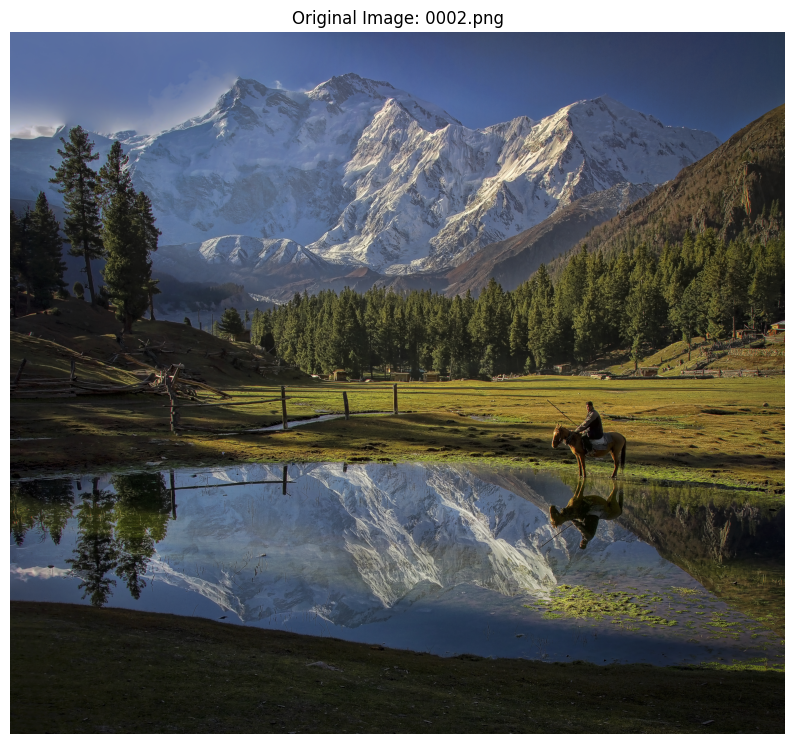

Image dimensions: 1848x2040, 3 channels


In [3]:
img_file_path = image_files[-1]
img_np_original, height_target, width_target, channels = load_image(data_folder, img_file_path)

In [4]:
# Initialize the model
device = torch.device(
    "mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu"
)

print("Currently using device:", device)

Currently using device: mps


In [5]:
# Define the target resolution for the image
H, W = 512, 512  # Adjust as needed

# Create the ImageFitting dataset
dataset = ImageFitting(image_path=os.path.join(data_folder, img_file_path), H=H, W=W)

# Create a DataLoader for the dataset
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

/opt/anaconda3/envs/main/lib/python3.10/site-packages/torch/functional.py:540: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:4316.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [6]:
# Initialize the Siren model
model = Siren(
    in_features=2,
    hidden_features=256,
    hidden_layers=3,
    out_features=3,
    outermost_linear=True,
    first_omega_0=30,
    hidden_omega_0=30,
)

# Move the model to the appropriate device
model.to(device)

Siren(
  (net): Sequential(
    (0): SineLayer(
      (linear): Linear(in_features=2, out_features=256, bias=True)
    )
    (1): SineLayer(
      (linear): Linear(in_features=256, out_features=256, bias=True)
    )
    (2): SineLayer(
      (linear): Linear(in_features=256, out_features=256, bias=True)
    )
    (3): SineLayer(
      (linear): Linear(in_features=256, out_features=256, bias=True)
    )
    (4): Linear(in_features=256, out_features=3, bias=True)
  )
)

Step 0, Total loss 0.271817


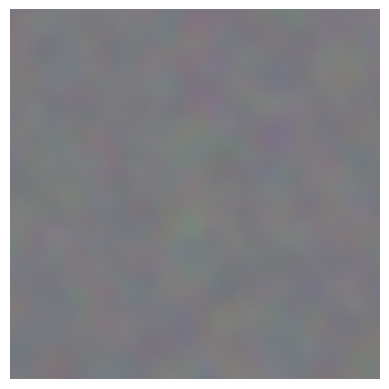

Step 250, Total loss 0.007806


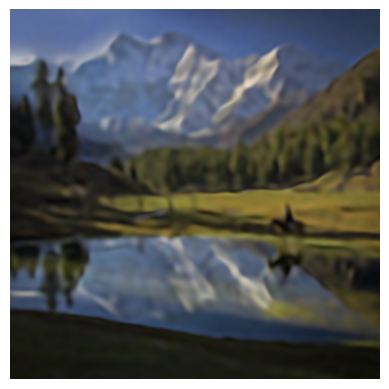

Step 500, Total loss 0.005014


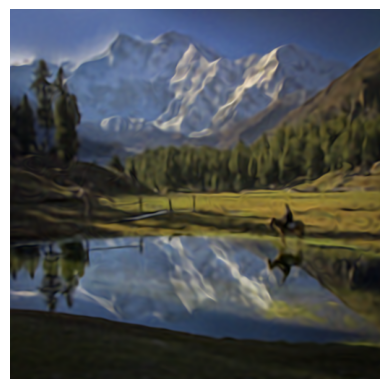

Step 750, Total loss 0.003285


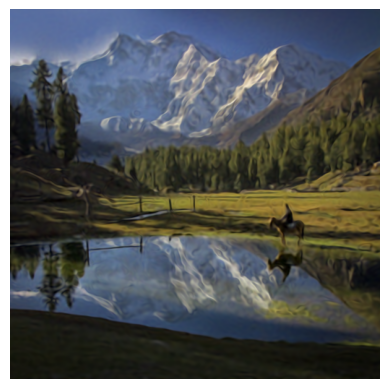

Step 1000, Total loss 0.002360


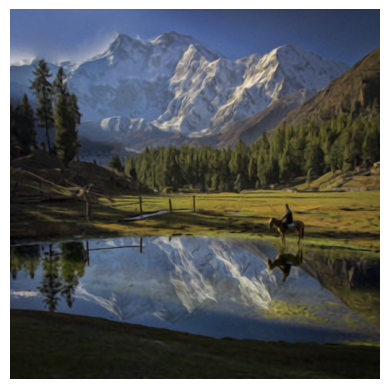

Step 1250, Total loss 0.001797


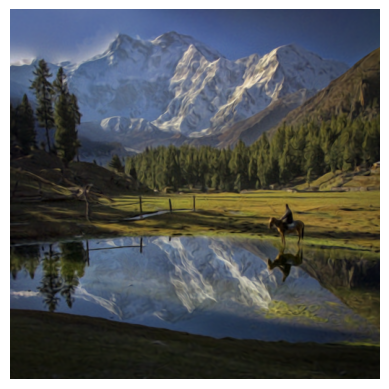

Step 1500, Total loss 0.001449


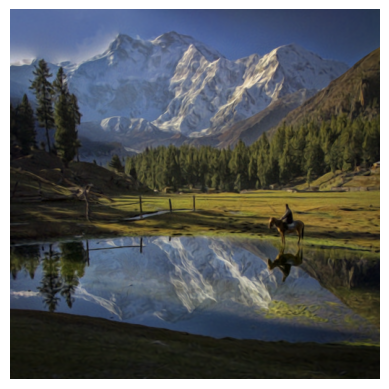

Step 1750, Total loss 0.001201


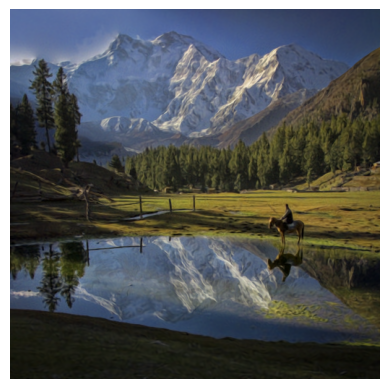

In [7]:
# Train the model
train_siren(
    model=model,
    dataloader=dataloader,
    total_steps=2000,
    steps_til_summary=250,
    lr=1e-4,
    device=device,
    H=H,
    W=W,
)